# Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or note model of the vehicle
the customer
 



In [2]:
# Importig libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading dataset
df=pd.read_csv('Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
months_as_customer,328,228,134,256,228,256,137,165,27,212,...,286,257,94,124,141,3,285,130,458,456
age,48,42,29,41,44,39,34,37,33,42,...,43,44,26,28,30,38,41,34,62,60
policy_number,521585,342868,687698,227811,367455,104594,413978,429027,485665,636550,...,663190,109392,215278,674570,681486,941851,186934,918516,533940,556080
policy_bind_date,17-10-2014,27-06-2006,06-09-2000,25-05-1990,06-06-2014,12-10-2006,04-06-2000,03-02-1990,05-02-1997,25-07-2011,...,05-02-1994,12-07-2006,24-10-2007,08-12-2001,24-03-2007,16-07-1991,05-01-2014,17-02-2003,18-11-2011,11-11-1996
policy_state,OH,IN,OH,IL,IL,OH,IN,IL,IL,IL,...,IL,OH,IN,OH,IN,OH,IL,OH,IL,OH
policy_csl,250/500,250/500,100/300,250/500,500/1000,250/500,250/500,100/300,100/300,100/300,...,100/300,100/300,100/300,250/500,500/1000,500/1000,100/300,250/500,500/1000,250/500
policy_deductable,1000,2000,2000,2000,1000,1000,1000,1000,500,500,...,500,1000,500,1000,1000,1000,1000,500,2000,1000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91,1351.1,1333.35,1137.03,1442.99,1315.68,...,1564.43,1280.88,722.66,1235.14,1347.04,1310.8,1436.79,1383.49,1356.92,766.19
umbrella_limit,0,5000000,5000000,6000000,6000000,0,0,0,0,0,...,3000000,0,0,0,0,0,0,3000000,5000000,0
insured_zip,466132,468176,430632,608117,610706,478456,441716,603195,601734,600983,...,477644,433981,433696,443567,430665,431289,608177,442797,441714,612260


In [5]:
# Dropping _c39 because it has null values in every row
df.drop(columns={'_c39'},inplace=True)

In [6]:
# Dimension of datset
df.shape

(1000, 39)

Dataset contains 1000 rows and 39 columns. in which 1 column is our target variable.

In [7]:
# dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
# datatypes in dataset
df.dtypes.to_frame('DataType')

,DataType
months_as_customer,int64
age,int64
policy_number,int64
policy_bind_date,object
policy_state,object
policy_csl,object
policy_deductable,int64
policy_annual_premium,float64
umbrella_limit,int64
insured_zip,int64


Three types of data is present in dataset (integer, float, and object). although we have 2 date columns whose datatypes should be datetime but it is counting in object datatype. So we are going to change the datatype of these two columns.

In [9]:
# Changing policy_bind_date and incident_date datatype
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [10]:
df.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [11]:
# null values in dataset
df.isna().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

Only authorities_contacted has 91 null values.

In [12]:
# Value counts in each column
for column in df.columns:
    print(column)
    print(df[column].value_counts())
    print('-'*80)
    print('\n')

months_as_customer
months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64
--------------------------------------------------------------------------------


age
age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64
--------------------------------------------------------------------------------


policy_number
policy_number
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: count, Length: 1000, dtype: int64
----------

We saw that only authoroties_contacted has null values. but here we can see that some columns has '?' as values which we are considering as null values.

In [13]:
# Unique values in each column
for column in df.columns:
    print(column)
    print(df[column].unique())
    print('='*80)
    print('\n')

months_as_customer
[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 309

Here we can confirm that Collision type, property damage and police report available has '?' as values.

In [14]:
# rows where collision type have ?
df[df['collision_type']=='?']

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
13,121,34,626808,2012-10-26,OH,100/300,1000,936.61,0,464652,...,1,NO,7280,1120,1120,5040,Toyota,Highlander,2010,N
26,257,43,863236,1990-09-20,IN,100/300,2000,1322.10,0,436984,...,3,YES,9020,1640,820,6560,Toyota,Camry,2005,N
27,202,34,608513,2002-07-18,IN,100/300,500,848.07,3000000,607730,...,1,?,5720,1040,520,4160,Suburu,Forrestor,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,163,37,390256,2009-11-25,IN,500/1000,1000,1200.33,4000000,477631,...,1,YES,3900,390,780,2730,Volkswagen,Jetta,2008,Y
969,398,55,844062,1990-05-25,OH,250/500,500,862.19,0,606858,...,3,?,6600,600,1200,4800,Accura,MDX,2012,N
983,17,39,774895,2006-10-28,IL,250/500,1000,840.95,0,431202,...,1,?,3440,430,430,2580,Suburu,Legacy,2002,N
994,141,30,681486,2007-03-24,IN,500/1000,1000,1347.04,0,430665,...,2,YES,6480,540,1080,4860,Honda,Civic,1996,N


In [15]:
# Rows where property damage have '?'
df[df['property_damage']=='?']

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
16,70,26,558938,2005-06-08,OH,500/1000,1000,1199.44,5000000,619884,...,2,YES,52110,5790,5790,40530,Nissan,Maxima,2012,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,124,28,674570,2001-12-08,OH,250/500,1000,1235.14,0,443567,...,1,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N
994,141,30,681486,2007-03-24,IN,500/1000,1000,1347.04,0,430665,...,2,YES,6480,540,1080,4860,Honda,Civic,1996,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [16]:
# Duplicate data in dataset
df.duplicated().sum()

0

No duplicate data is present in dataset.

In [17]:
# Replacing '?' as missing values
df.replace('?',np.nan,inplace=True)

In [18]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

After considering '?' as null values. Now we have 178 null values in collision type, 91 null values in authorities contacted, 360  null values in property damage and 343 in police report available. 

In [19]:
# null value percentage
round(df.isnull().sum()/df.shape[0]*100,1).to_frame('Null value percentage')

,Null value percentage
months_as_customer,0.0
age,0.0
policy_number,0.0
policy_bind_date,0.0
policy_state,0.0
policy_csl,0.0
policy_deductable,0.0
policy_annual_premium,0.0
umbrella_limit,0.0
insured_zip,0.0


In [20]:
# Importing Simple Imptuter
from sklearn.impute import SimpleImputer

In [21]:
# Filling null values
df[['collision_type','authorities_contacted','property_damage','police_report_available']]=SimpleImputer(strategy='most_frequent').fit_transform(df[['collision_type','authorities_contacted','property_damage','police_report_available']])

In [22]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [23]:
# df.head()
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
6,137,34,413978,2000-06-04,IN,250/500,1000,1333.35,0,441716,...,0,NO,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,1990-02-03,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
8,27,33,485665,1997-02-05,IL,100/300,500,1442.99,0,601734,...,1,YES,27700,2770,2770,22160,Toyota,Camry,2012,N
9,212,42,636550,2011-07-25,IL,100/300,500,1315.68,0,600983,...,1,NO,42300,4700,4700,32900,Saab,92x,1996,N


In [24]:
# Df.tail()
df.tail(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
990,286,43,663190,1994-02-05,IL,100/300,500,1564.43,3000000,477644,...,2,YES,34290,3810,3810,26670,Jeep,Grand Cherokee,2013,N
991,257,44,109392,2006-07-12,OH,100/300,1000,1280.88,0,433981,...,1,NO,46980,0,5220,41760,Accura,TL,2002,N
992,94,26,215278,2007-10-24,IN,100/300,500,722.66,0,433696,...,2,YES,36700,3670,7340,25690,Nissan,Pathfinder,2010,N
993,124,28,674570,2001-12-08,OH,250/500,1000,1235.14,0,443567,...,1,NO,60200,6020,6020,48160,Volkswagen,Passat,2012,N
994,141,30,681486,2007-03-24,IN,500/1000,1000,1347.04,0,430665,...,2,YES,6480,540,1080,4860,Honda,Civic,1996,N
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N
999,456,60,556080,1996-11-11,OH,250/500,1000,766.19,0,612260,...,3,NO,5060,460,920,3680,Mercedes,E400,2007,N


as we can see out of 20 rows(10 top rows and 10 bottom rows) umbrella_limit has 13 rows with 0 value.So we are going to check how many rows have 0 in total 1000 rows.

In [25]:
# Checking how many rows in umbrella limit has 0 as value
df[df['umbrella_limit']==0].shape[0]

798

Out of 1000 rows umbrella limit has 0 in 798 rows which is 79.8 % of all the rows. So we are going to drop this column later.

In [26]:
# Count of unique values in dataset
df.nunique().to_frame('Number of unique values')

,Number of unique values
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


Policy number is unique column and incident location has different value in every row. Hence we are going to drop these columns.

In [27]:
# Dropping umbrella limit, date columns, policy number and incident location
df.drop(columns={'umbrella_limit','policy_bind_date','incident_date','policy_number','incident_location'},inplace=True)

In [28]:
df.shape

(1000, 34)

In [29]:
# description of data
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [30]:
# making list of numerical columns
numerical_columns=[]
for column in df.columns:
    if df[column].dtype!='object':
        numerical_columns.append(column)

In [31]:
print(len(numerical_columns))

16


In [32]:
numerical_columns

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

# Graphical Analysis

Univariate

fraud_reported
N    753
Y    247
Name: count, dtype: int64


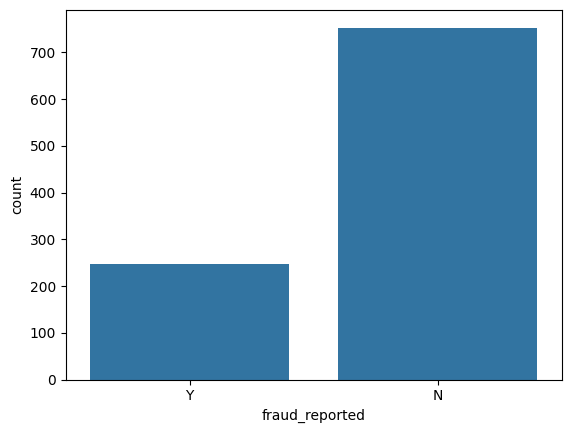

In [33]:
# Class value count
print(df['fraud_reported'].value_counts())
sns.countplot(x='fraud_reported',data=df)
plt.show()

Count of fraud_report 'No' is much higher than 'Yes' So we have Class imbalance in dataset. which we will rectify in the later part of this project.

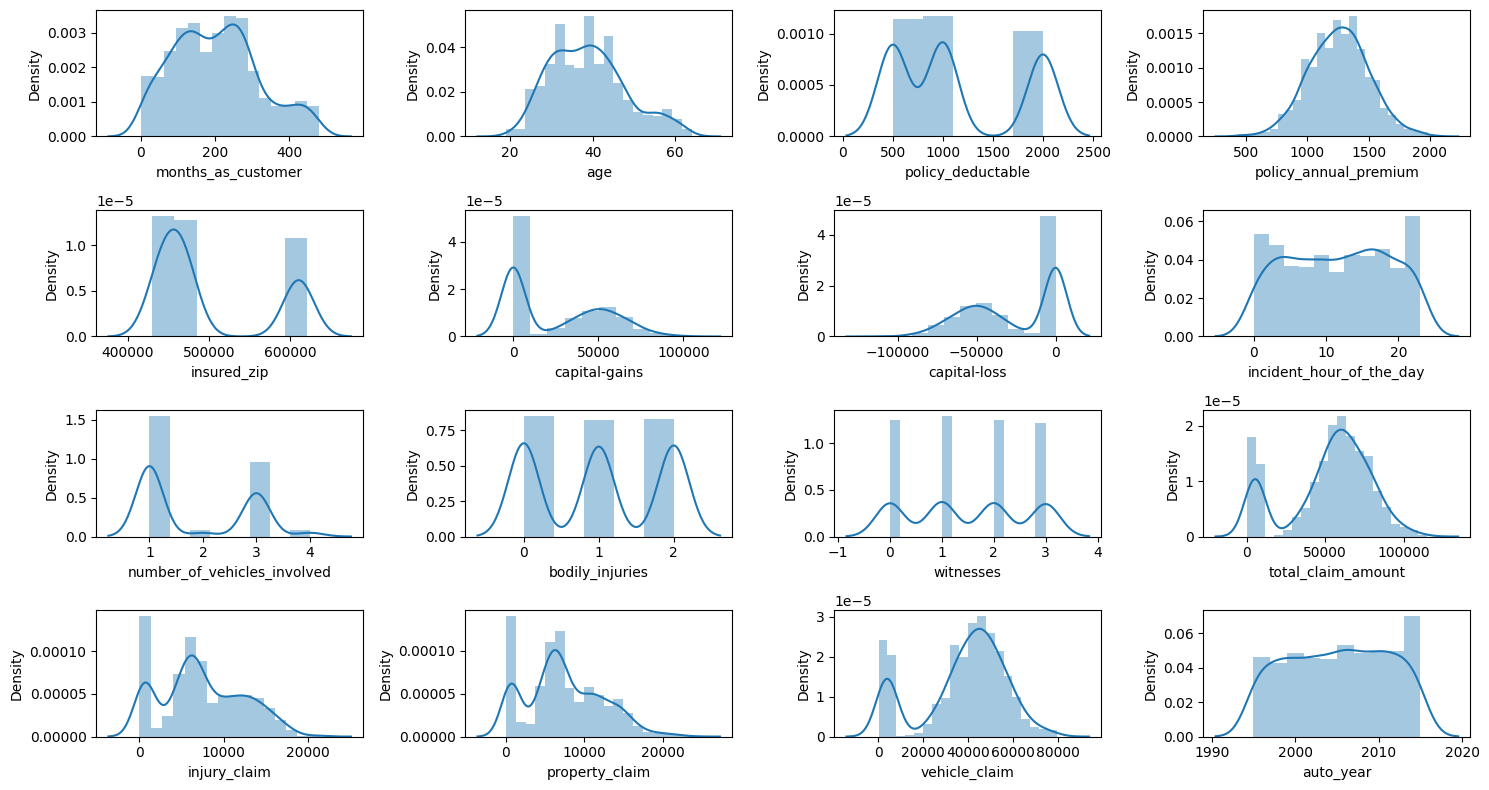

In [34]:
# Checking distribution of numerical columns
plt.figure(figsize=(15,8))
plot=1
for column in numerical_columns:
    if plot<=16:
        subplt=plt.subplot(4,4,plot)
        sns.distplot(df[column])
        plt.xlabel(column)
    plot+=1
plt.tight_layout()

1) Insured zip, capital_gains, injury claim and property claim has right skewed distrbution.
2) Capital_loss has left skewed distribution.

Bivariate

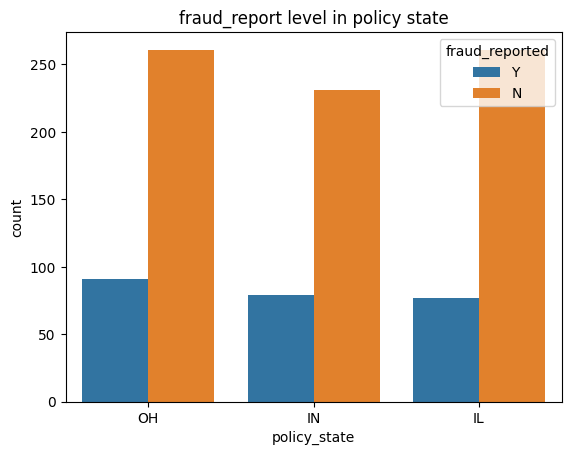

In [35]:
# Checking fraud_report level in policy state
sns.countplot(x='policy_state',data=df,hue='fraud_reported')
plt.title('fraud_report level in policy state')
plt.show()

OH policy_state has most number of 'Yes' fraud reported compared tp IN and IL policy states.

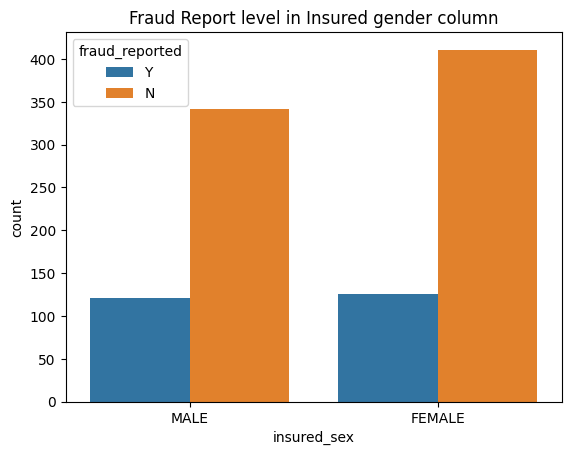

In [36]:
# Checking fraud_report level in Insured Gender
sns.countplot(x='insured_sex',data=df,hue='fraud_reported')
plt.title('Fraud Report level in Insured gender column')
plt.show()

Chances of fruad reported in Female gender is little higher than Male gender.

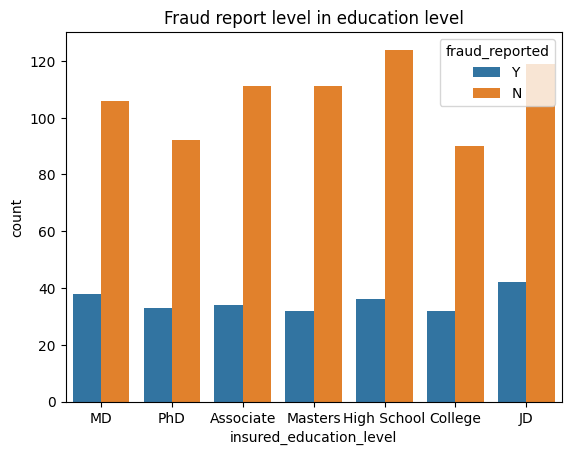

In [37]:
# Checking fraud_report level in insured education level
sns.countplot(x='insured_education_level',data=df,hue='fraud_reported')
plt.title('Fraud report level in education level')
plt.show()

Insured_education_level JD has Highest count of Fraud_reported

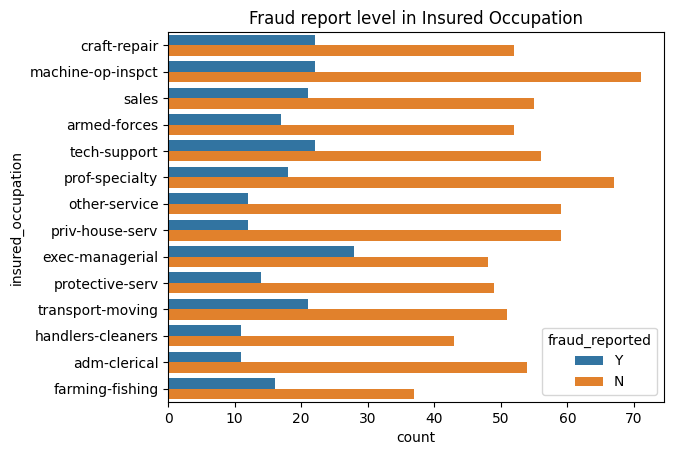

In [38]:
# Checking fraud_report level in Insured Occupation.
sns.countplot(y='insured_occupation',data=df,hue='fraud_reported')
plt.title('Fraud report level in Insured Occupation')
plt.show()

Insured_occupation exec-managment has most number of fraud reported.

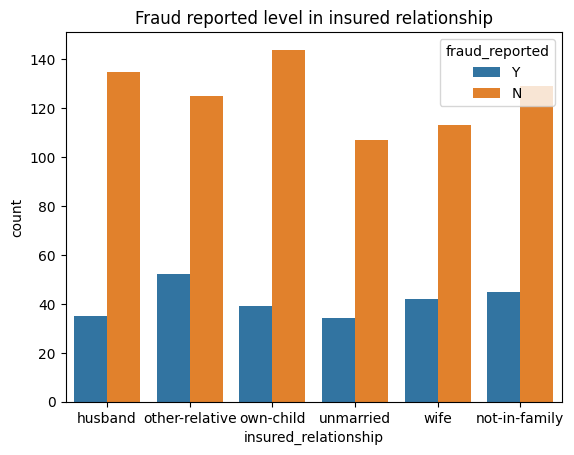

In [39]:
# Checking fraud_report level in Insured_relationship
sns.countplot(x='insured_relationship',data=df,hue='fraud_reported')
plt.title('Fraud reported level in insured relationship')
plt.show()

Other-relative has most number of fraud reported.

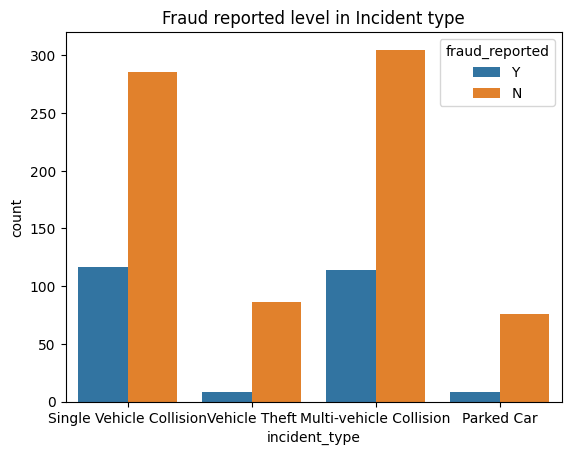

In [40]:
# Checking fraud_report level in Incident Type
sns.countplot(x='incident_type',data=df,hue='fraud_reported')
plt.title('Fraud reported level in Incident type')
plt.show()

Single vehicle collision and Multi vehicle collision have equal number of Fraud Reported. 

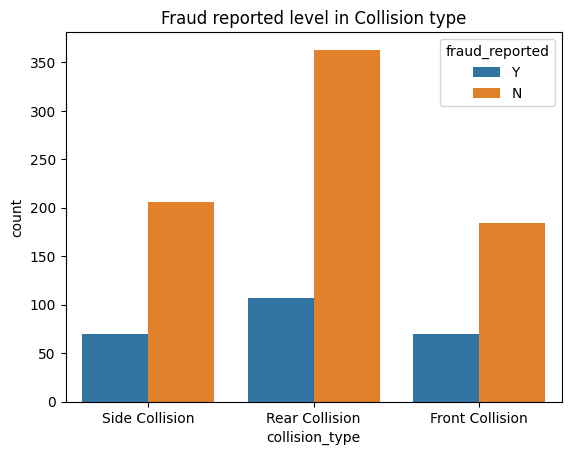

In [41]:
# Checking fraud_report level in Collision Type
sns.countplot(x='collision_type',data=df,hue='fraud_reported')
plt.title('Fraud reported level in Collision type')
plt.show()

Rear collision has most number of Fraud_reported.

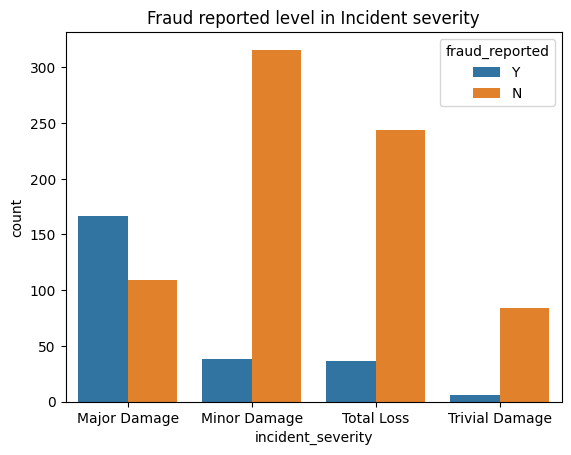

In [42]:
# Checking fraud_report level in Incident Severity
sns.countplot(x='incident_severity',data=df,hue='fraud_reported')
plt.title('Fraud reported level in Incident severity')
plt.show()

Chances of Fraud are high in major damage incident severity compared to other incident severity

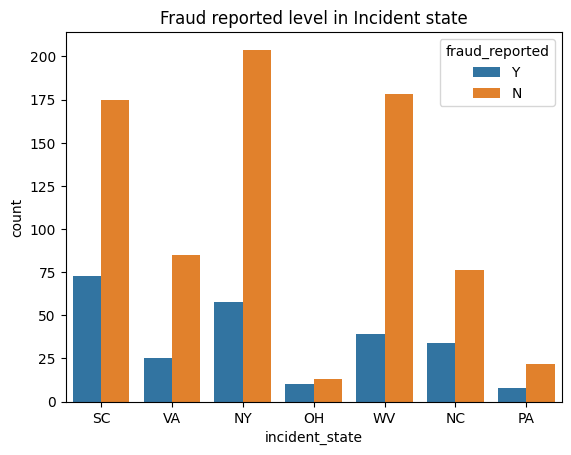

In [43]:
# Checking fraud_report level in Incident State
sns.countplot(x='incident_state',data=df,hue='fraud_reported')
plt.title('Fraud reported level in Incident state')
plt.show()

SC Incident_state has highest count of Fraud reported and PA has least.

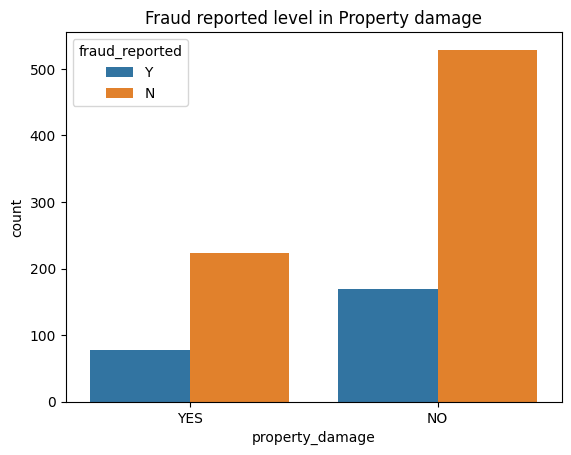

In [44]:
# Checking fraud_report level in Property Damage
sns.countplot(x='property_damage',data=df,hue='fraud_reported')
plt.title('Fraud reported level in Property damage')
plt.show()

If property is not damaged than the chances of fraud are high.

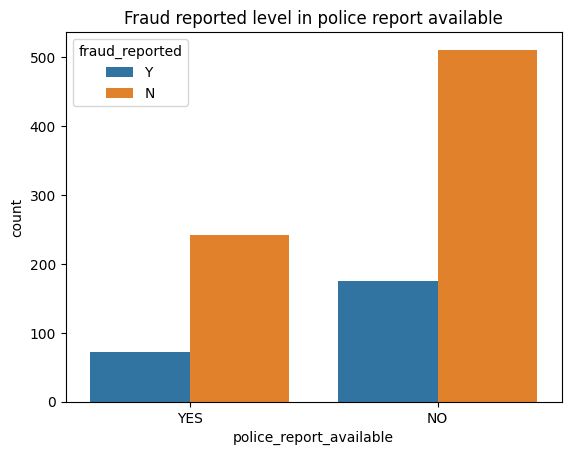

In [45]:
# Checking fraud_report level in Police Report Available
sns.countplot(x='police_report_available',data=df,hue='fraud_reported')
plt.title('Fraud reported level in police report available')
plt.show()

Chances of fraud are high if Police report is not available.

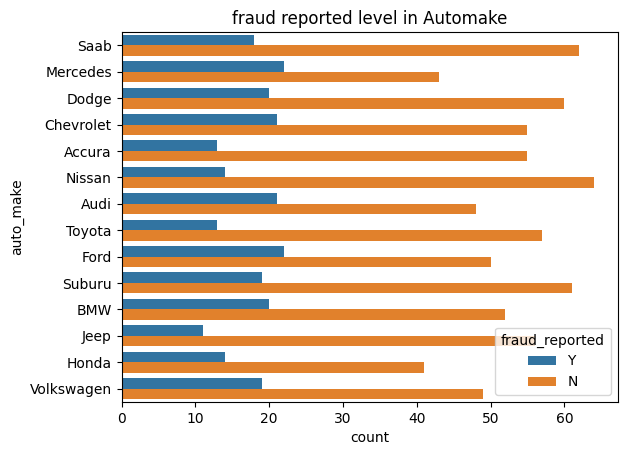

In [46]:
# Checking fraud_report level in Auto Make
sns.countplot(y='auto_make',data=df,hue='fraud_reported')
plt.title('fraud reported level in Automake')
plt.show()

Ford auto make has most count of fraud happened.

# Outliers

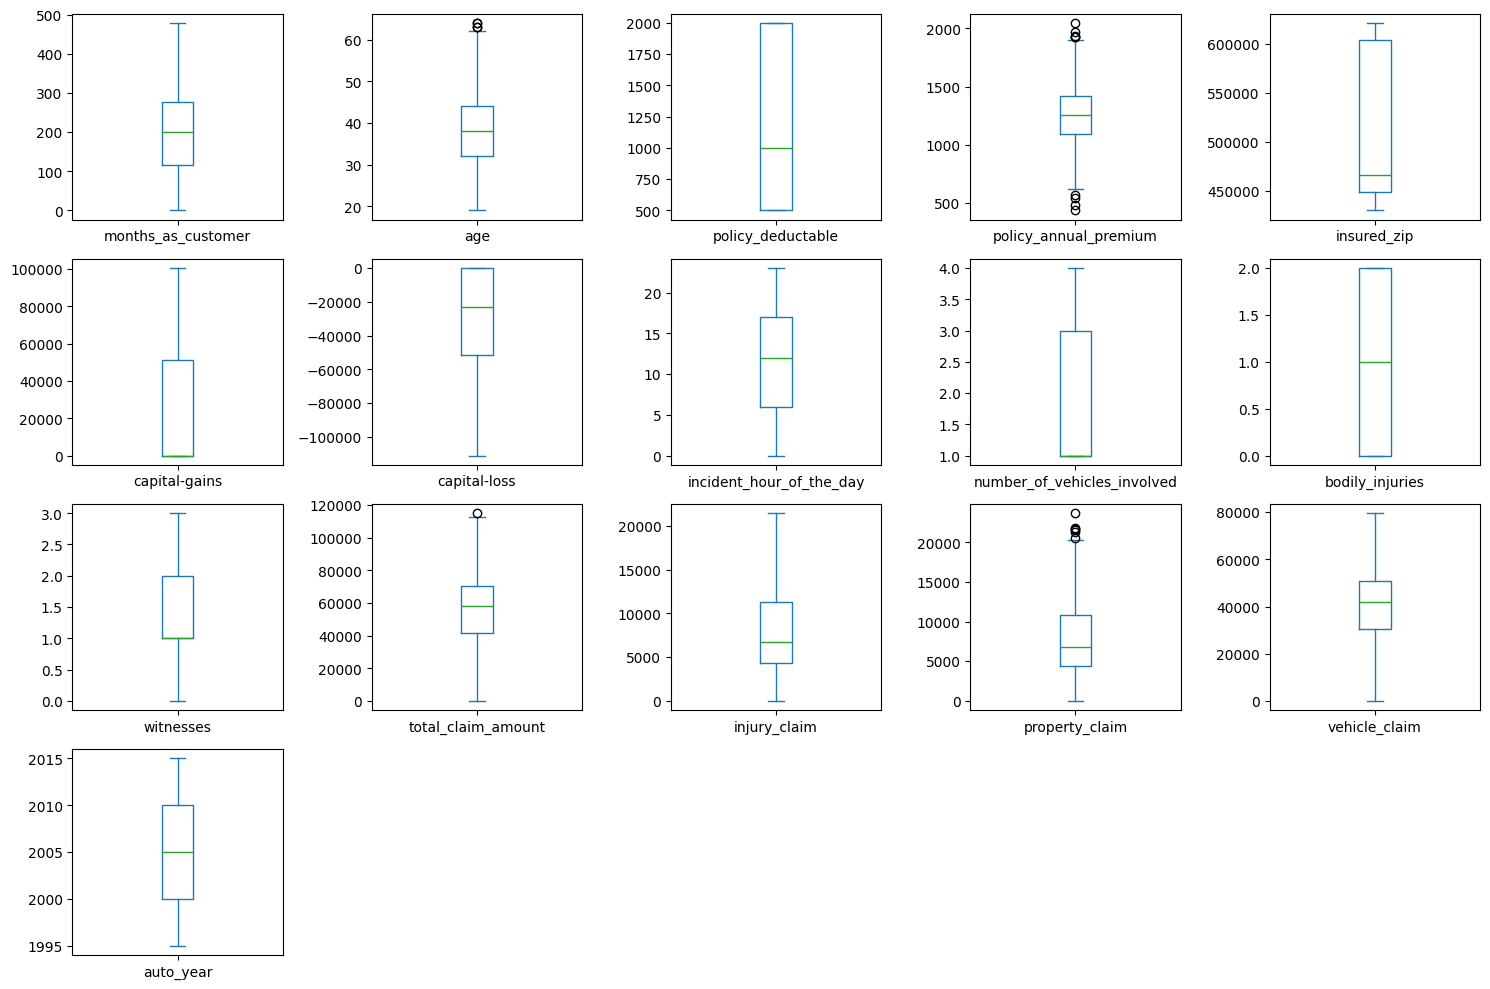

In [47]:
# Plotting box plot to check outliers
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))
plt.tight_layout()

Boxplot is showing that outliers are present in age, policy annual premium and property claim.

In [48]:
# Importing zscore
from scipy.stats import zscore

In [49]:
# Checking zscore
z=np.abs(zscore(df[['months_as_customer','age','policy_deductable','policy_annual_premium','insured_zip','capital-gains','capital-loss',
                   'incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','total_claim_amount','injury_claim',
                   'property_claim','vehicle_claim','auto_year']]))

In [50]:
# Threshold=3
print(np.where(z>3))

(array([229, 248, 500, 763, 807], dtype=int64), array([ 3,  3, 13,  3,  6], dtype=int64))


In [51]:
# Removing outliers
dfn=df[np.abs(z<3).all(axis=1)]

In [52]:
# Data loss percentage due to outliers
(df.shape[0]-dfn.shape[0])/df.shape[0]*100

0.5

0.5 % percent of data lost due to Outliers.

# Encoding

In [53]:
# Creating encoding function
def encoding(data):
    from sklearn.preprocessing import LabelEncoder
    for column in data.columns:
        if data[column].dtype=='object':
            data[column]=LabelEncoder().fit_transform(data[column])
    return data

In [54]:
dfn.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available  

In [55]:
# Encoding data
encoding(dfn)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2,1,1000,1406.91,466132,1,4,2,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,1,1,2000,1197.22,468176,1,4,6,...,0,0,5070,780,780,3510,8,12,2007,1
2,134,29,2,0,2000,1413.14,430632,0,6,11,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,0,1,2000,1415.74,608117,0,6,1,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,0,2,1000,1583.91,610706,1,0,11,...,1,0,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,431289,0,5,2,...,1,0,87200,17440,8720,61040,6,6,2006,0
996,285,41,0,0,1000,1436.79,608177,0,6,9,...,3,0,108480,18080,18080,72320,13,28,2015,0
997,130,34,2,1,500,1383.49,442797,0,5,1,...,3,1,67500,7500,7500,52500,11,19,1996,0
998,458,62,0,2,2000,1356.92,441714,1,0,5,...,1,1,46980,5220,5220,36540,1,5,1998,0


In [56]:
dfn.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available  

# Skewness

In [57]:
# Checking Skewness
dfn.skew()

months_as_customer             0.358958
age                            0.473974
policy_state                  -0.028196
policy_csl                     0.093128
policy_deductable              0.475849
policy_annual_premium          0.033107
insured_zip                    0.824182
insured_sex                    0.143294
insured_education_level        0.001403
insured_occupation            -0.061818
insured_hobbies               -0.061489
insured_relationship           0.078491
capital-gains                  0.479472
capital-loss                  -0.379708
incident_type                  0.101056
collision_type                -0.033901
incident_severity              0.274925
authorities_contacted         -0.301554
incident_state                -0.146787
incident_city                  0.047785
incident_hour_of_the_day      -0.040232
number_of_vehicles_involved    0.503045
property_damage                0.855977
bodily_injuries                0.012979
witnesses                      0.027371


1) Skewness is present in Insured zip and Vehicle claim
2) Skewness is also present in police report available and fraud reported column but police report available is categorical column and Fraud_reported is target variable. Hence we can't remove skewness from these two.

In [58]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer

In [59]:
# Removing skewness
dfn[['insured_zip','vehicle_claim']]=PowerTransformer().fit_transform(dfn[['insured_zip','vehicle_claim']])

In [60]:
dfn.skew()

months_as_customer             0.358958
age                            0.473974
policy_state                  -0.028196
policy_csl                     0.093128
policy_deductable              0.475849
policy_annual_premium          0.033107
insured_zip                    0.000000
insured_sex                    0.143294
insured_education_level        0.001403
insured_occupation            -0.061818
insured_hobbies               -0.061489
insured_relationship           0.078491
capital-gains                  0.479472
capital-loss                  -0.379708
incident_type                  0.101056
collision_type                -0.033901
incident_severity              0.274925
authorities_contacted         -0.301554
incident_state                -0.146787
incident_city                  0.047785
incident_hour_of_the_day      -0.040232
number_of_vehicles_involved    0.503045
property_damage                0.855977
bodily_injuries                0.012979
witnesses                      0.027371


# Correlation

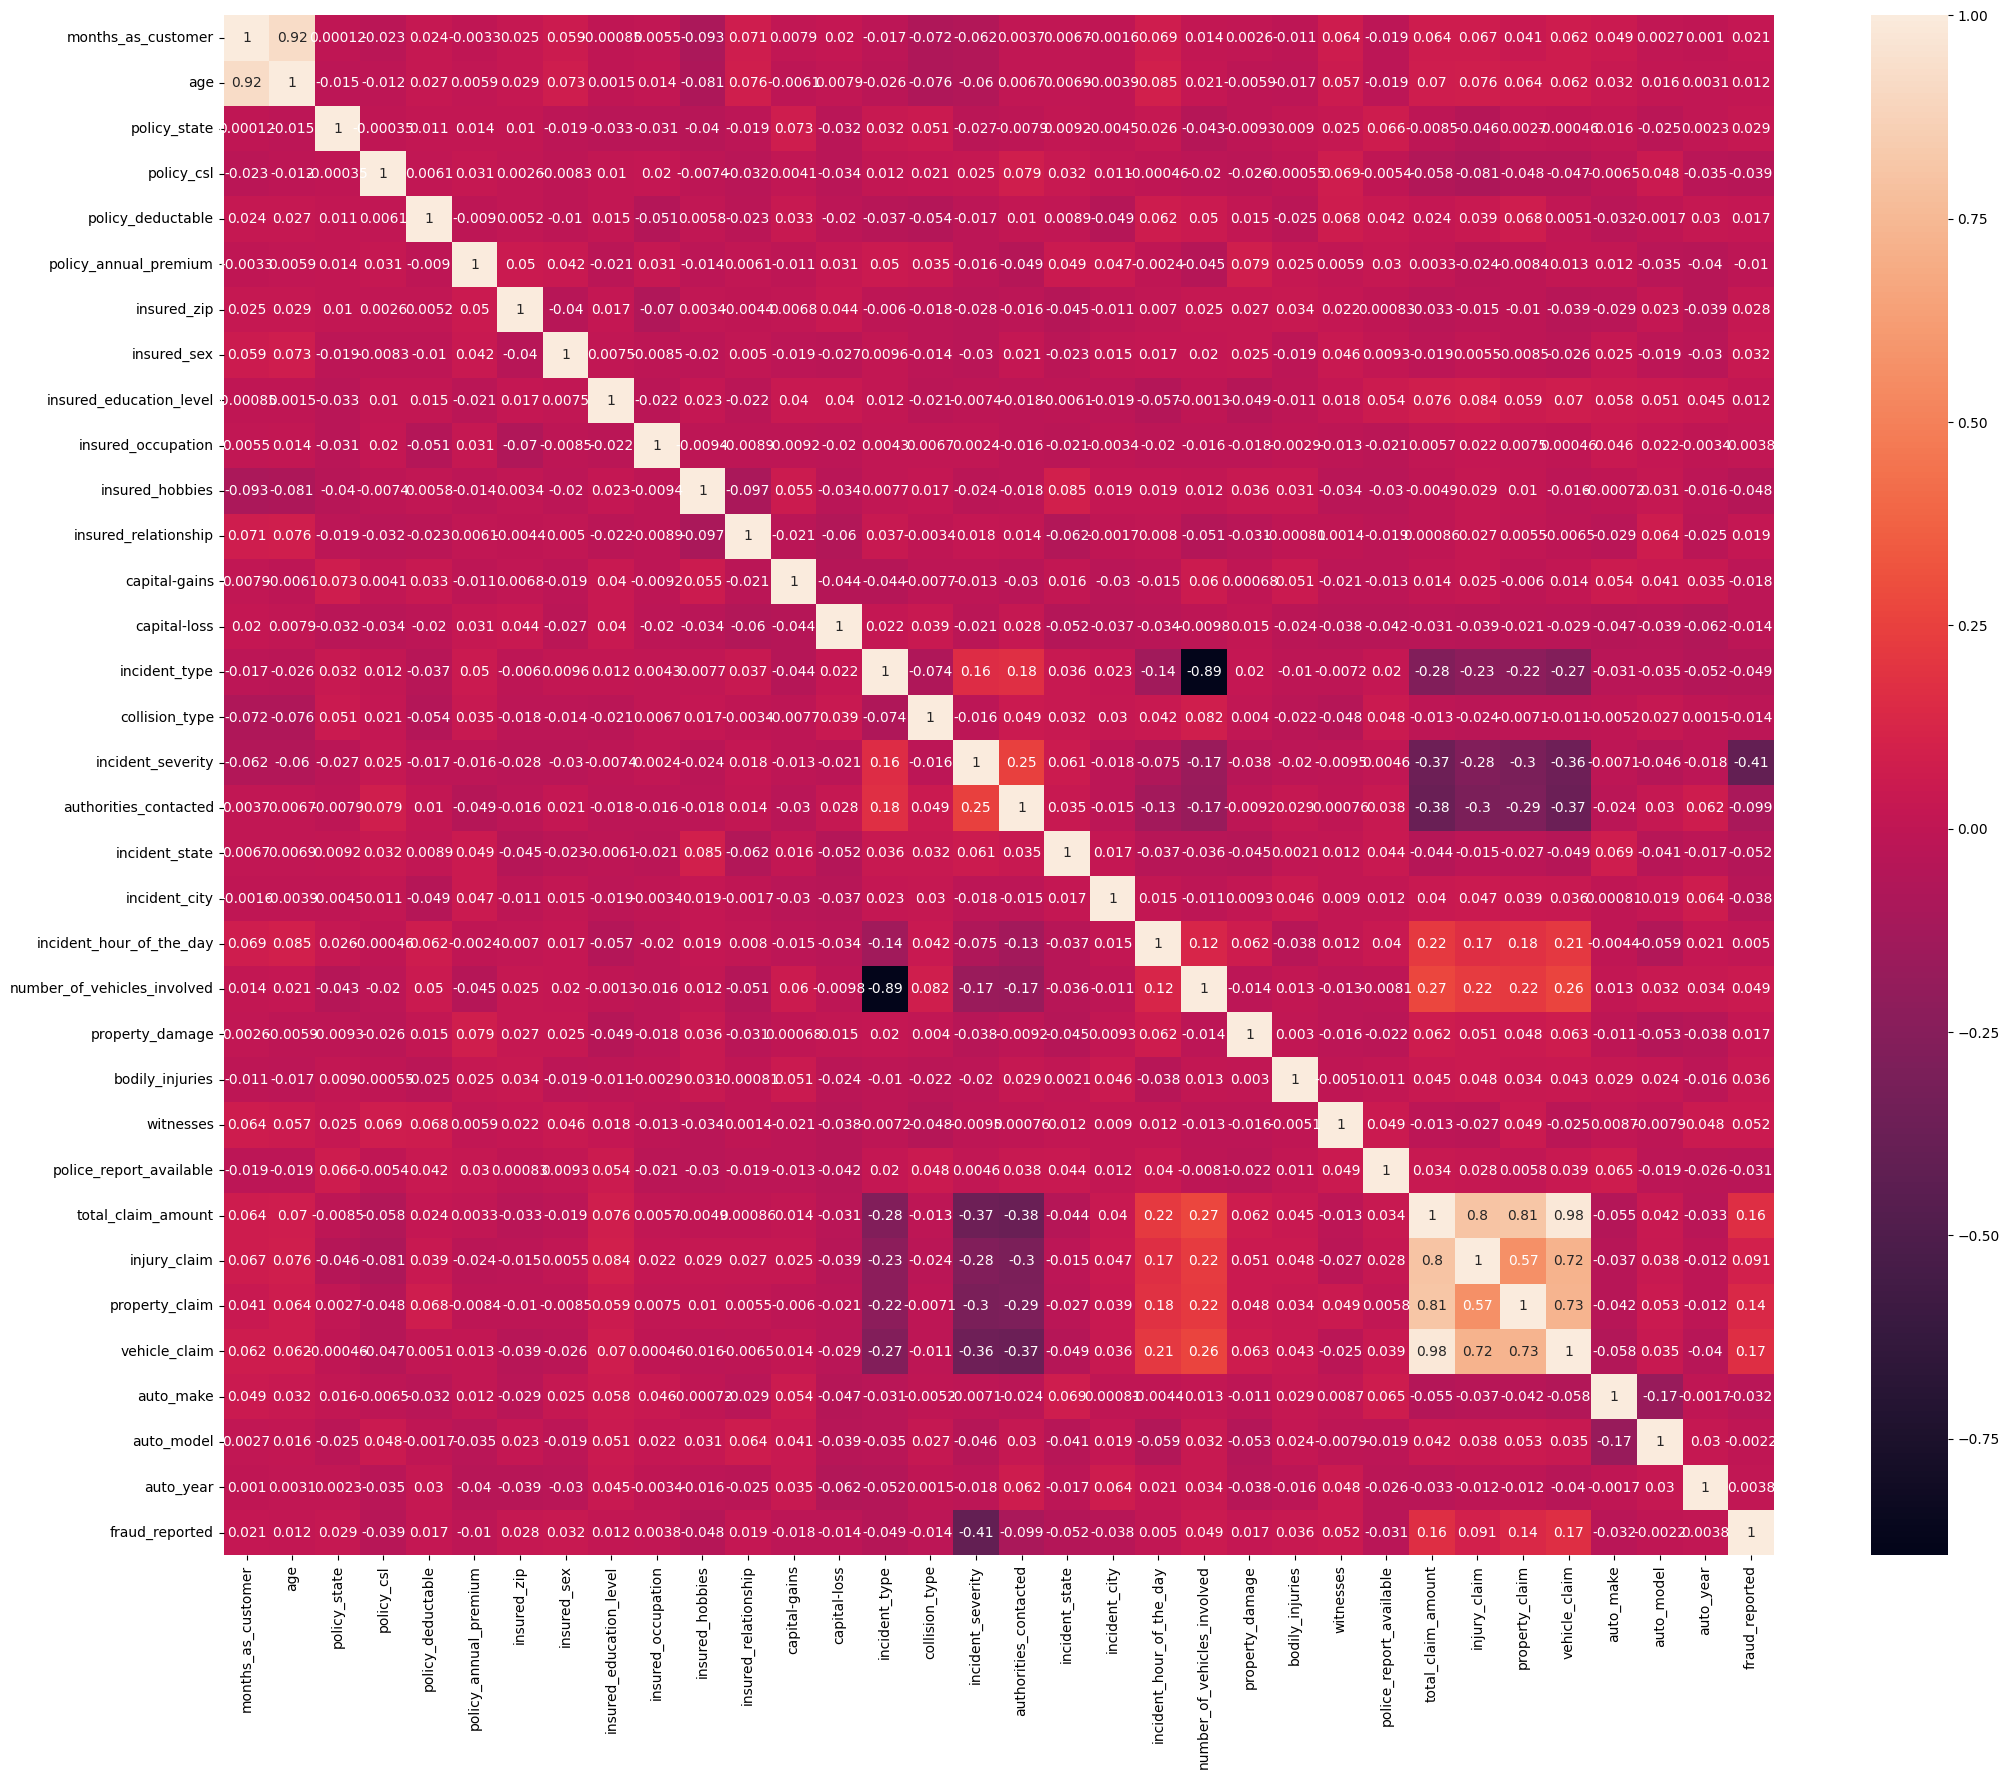

In [61]:
# Plotting heatmap to visualize corrlation
plt.figure(figsize=(25,20))
sns.heatmap(dfn.corr(),annot=True)
plt.show()

1) Incident severity has highest negative correlatio  with fraud reported.
2) Apart from it none other column has very strong correlation with target variable.

In [62]:
# Dropping least related column
dfn.drop(columns={'insured_occupation','incident_hour_of_the_day','auto_model','auto_year'},inplace=True)

Splitting X and Y data

In [63]:
# Splitting input and Target data
x=dfn.drop(columns={'fraud_reported'})
y=dfn['fraud_reported']

# Scaling

In [64]:
# Creating Scaling Function
def scaling(data):
    from sklearn.preprocessing import StandardScaler
    data=pd.DataFrame(StandardScaler().fit_transform(data),columns=data.columns)
    return data

In [65]:
# Scaling input data
x=scaling(x)

In [66]:
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,insured_education_level,insured_hobbies,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make
0,1.073984,0.986592,1.185517,0.063692,-0.223417,0.621478,-0.365812,1.074095,0.530840,1.279322,...,-0.823907,1.514827,0.008593,0.468407,1.479562,0.716696,-0.187157,1.175508,0.754862,0.856250
1,0.204584,0.330183,-0.018146,0.063692,1.411141,-0.250891,-0.315739,1.074095,0.530840,0.927345,...,-0.823907,-0.660141,-1.212826,-1.334551,-0.675876,-1.807055,-1.362033,-1.375940,-1.786644,0.359765
2,-0.612651,-1.092035,1.185517,-1.178928,1.411141,0.647396,-1.217059,-0.931017,1.556443,-1.360507,...,1.139655,-0.660141,1.230012,1.369886,-0.675876,-0.685135,0.056840,-0.735994,-0.819535,-0.633206
3,0.448016,0.220782,-1.221808,0.063692,1.411141,0.658213,1.486901,-0.931017,1.556443,-1.360507,...,-0.823907,-0.660141,0.008593,0.468407,-0.675876,0.405305,-0.222014,-0.216949,0.678811,-0.881449
4,0.204584,0.548986,-1.221808,1.306313,-0.223417,1.357847,1.486901,1.074095,-1.520366,-1.360507,...,-0.823907,-0.660141,-1.212826,-0.433072,-0.675876,-1.752817,-1.255413,-1.403039,-1.739916,-1.626177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,-1.751565,-0.107422,1.185517,1.306313,-0.223417,0.221633,-1.166985,-0.931017,1.043641,0.575368,...,-0.823907,1.514827,-1.212826,-0.433072,-0.675876,1.307999,2.053925,0.279166,1.259994,-0.136721
991,0.700142,0.220782,-1.221808,-1.178928,-0.223417,0.745787,1.486901,-0.931017,1.556443,1.279322,...,-0.823907,1.514827,1.230012,1.369886,-0.675876,2.115114,2.185151,2.230274,1.904962,1.600979
992,-0.647427,-0.545028,1.185517,0.063692,-1.040696,0.524044,-0.916619,-0.931017,1.043641,-1.184518,...,1.139655,-0.660141,1.230012,1.369886,1.479562,0.560811,0.015832,0.024855,0.778382,1.104493
993,2.204203,2.518212,-1.221808,1.306313,1.411141,0.413506,-0.916619,1.074095,-1.520366,-1.712484,...,-0.823907,-0.660141,-1.212826,-0.433072,1.479562,-0.217478,-0.451658,-0.450415,-0.102780,-1.377934


# Multicolinearity

In [67]:
# Creating Vif function
def vif(data):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif=pd.DataFrame()
    vif['columns']=data.columns
    vif['VIF']=[variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
    return vif

In [68]:
# Checking vif
vif(x)

,columns,VIF
0,months_as_customer,6.820845
1,age,6.815221
2,policy_state,1.028279
3,policy_csl,1.024395
4,policy_deductable,1.031420
5,policy_annual_premium,1.033453
6,insured_zip,1.022997
7,insured_sex,1.026258
8,insured_education_level,1.028197
9,insured_hobbies,1.048533


Total Claim amount has too high VIF score. Going to drop it

In [69]:
# Dropping total_claim_amount due to high VIF score
x.drop('total_claim_amount',axis=1,inplace=True)

In [70]:
vif(x)

,columns,VIF
0,months_as_customer,6.820723
1,age,6.815154
2,policy_state,1.028277
3,policy_csl,1.023663
4,policy_deductable,1.031254
5,policy_annual_premium,1.032979
6,insured_zip,1.021803
7,insured_sex,1.025767
8,insured_education_level,1.028152
9,insured_hobbies,1.043925


# Class Imbalance

In [71]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [72]:
y.value_counts()

fraud_reported
0    749
1    246
Name: count, dtype: int64

In [73]:
# Balancing Class
x1,y1=SMOTE().fit_resample(x,y)

In [74]:
y1.value_counts()

fraud_reported
1    749
0    749
Name: count, dtype: int64

Class variable balanced.

# Random State

In [75]:
# Creating random State function
def random_state(model,x,y):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    rs=0
    acc=0
    for i in range(1,300):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
        model.fit(x_train,y_train)
        accu=accuracy_score(y_test,model.predict(x_test))
        if accu>acc:
            acc=accu
            rs=i
    print('best accuracy of {} at random_state {}.'.format(round(acc*100,2),rs))

In [76]:
# Importing model
from sklearn.ensemble import RandomForestClassifier

In [77]:
# Finding best random state
random_state(RandomForestClassifier(),x1,y1)

best accuracy of 92.67 at random_state 276.


In [79]:
# importing classification metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [80]:
# Splitting train test data
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.30,random_state=276)

In [81]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1048, 28)
(450, 28)
(1048,)
(450,)


# Model

In [82]:
# Importing classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier

In [83]:
# Creating model variables
LR=LogisticRegression()
DTC=DecisionTreeClassifier()
GNB=GaussianNB()
KNC=KNeighborsClassifier()
SVC=SVC()
ABC=AdaBoostClassifier()
GBC=GradientBoostingClassifier()
ETC=ExtraTreesClassifier()
BGC=BaggingClassifier()
RFC=RandomForestClassifier()

In [84]:
# Creating list
models=[LR,
       DTC,
       GNB,
       KNC,
       SVC,
       ABC,
       GBC,
       ETC,
       BGC,
       RFC]

In [85]:
# Iterating each model using for loop to check their performance
for model in models:
    model.fit(xtrain,ytrain)
    pred=model.predict(xtest)
    accur=accuracy_score(ytest,pred)
    print(model)
    print(round(accur*100,2))
    print(confusion_matrix(ytest,pred))
    print(classification_report(ytest,pred))
    print("CVSCORE")
    cvscore=cross_val_score(model,x1,y1)
    print(cvscore)
    print(cvscore.mean())
    print('Difference between Acuracy score and CV mean Score for model {} is'.format(model),round(accur*100-cvscore.mean()*100,2))
    print('*'*100)
    print('\n')

LogisticRegression()
75.11
[[167  69]
 [ 43 171]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       236
           1       0.71      0.80      0.75       214

    accuracy                           0.75       450
   macro avg       0.75      0.75      0.75       450
weighted avg       0.76      0.75      0.75       450

CVSCORE
[0.73       0.73       0.73333333 0.72240803 0.73913043]
0.730974358974359
Difference between Acuracy score and CV mean Score for model LogisticRegression() is 2.01
****************************************************************************************************


DecisionTreeClassifier()
81.78
[[193  43]
 [ 39 175]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       236
           1       0.80      0.82      0.81       214

    accuracy                           0.82       450
   macro avg       0.82      0.82      0.82       450
weighted avg       0.

ExtraTreesClassifier is giving highest accuracy of 93.56 % and also have very small differnce of 2.16 between cv score and accuracy score. Hence considering It as best performing model on this dataset.

# Hyperparameter Tunning

In [86]:
# Importing GridsearchCV
from sklearn.model_selection import GridSearchCV

In [87]:
# Best performing model
ETC

ExtraTreesClassifier()

In [88]:
# Creating parameter dictionary
parameters={'n_estimators':[100,150,200,250,300],
           'criterion':['gini','entropy','log_loss'],
           'max_features':['sqrt','log2',None],
           'class_weight':['balanced','balanced_subsample'],
           'random_state':range(1,30)}

In [89]:
# Sending Model and its parameters into GridSearchCV
gscv=GridSearchCV(ETC,parameters)

In [90]:
# Searching for best parameters
gscv.fit(xtrain,ytrain)

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 150, 200, 250, 300],
                         'random_state': range(1, 30)})

In [91]:
# Best parameters
gscv.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_features': None,
 'n_estimators': 100,
 'random_state': 14}

In [92]:
# Creating model with parameters given by GridSearchCV
ModelETC=ExtraTreesClassifier(class_weight='balanced',
                             criterion='gini',
                             max_features=None,
                             n_estimators=100,
                             random_state=14)

In [93]:
# training model
ModelETC.fit(xtrain,ytrain)

ExtraTreesClassifier(class_weight='balanced', max_features=None,
                     random_state=14)

In [94]:
#accuracy_score
PredModel=ModelETC.predict(xtest)

In [95]:
# Accuracy score
round(accuracy_score(ytest,PredModel)*100,2)

92.67

In [96]:
# accuracy score of model with default parameter
round(accuracy_score(ytest,ETC.predict(xtest))*100,2)

93.56

Accuracy score of Model with tunned parameter is little less than Model with default parameter. So we going to save model with default parameter.

In [97]:
# Best performing model
ModelETC=ExtraTreesClassifier()

In [99]:
ModelETC.fit(xtrain,ytrain)

ExtraTreesClassifier()

In [100]:
PredETC=ModelETC.predict(xtest)

# AUC ROC Curve

In [102]:
# Importing metrics 
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

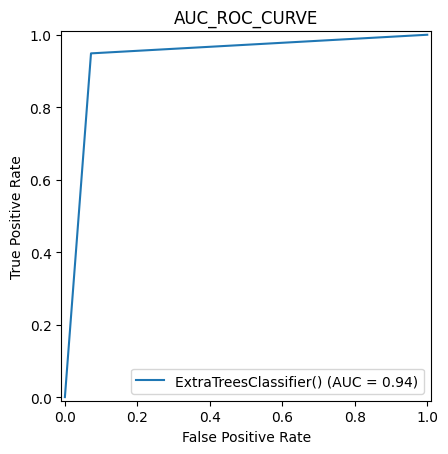

In [103]:
# Plotting Auc roc curve
fpr,tpr,thresholds=roc_curve(ytest,PredETC)
roc_auc=auc(fpr,tpr)
plot=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=ModelETC)
plot.plot()
plt.title('AUC_ROC_CURVE')
plt.show()

# Saving model

In [104]:
# Importing pickle
import pickle

In [105]:
# filename
filename='insurance_fraud.pkl'

In [106]:
# Saving best model
pickle.dump(ModelETC,open(filename,'wb'))